In [1]:
import pandas as pd

In [2]:
df=pd.read_excel('LOs_for_improvement_Final.xlsx')# load files after the improvements were made

In [3]:
df.shape

(4462, 8)

In [4]:
df = df[
    df['NVS_Course_Description - NEW'].str.lower().str.contains('delete')!=True]
df = df[
    df['NVS_Course_Description - NEW'].str.lower().str.contains('deactivate')!=True]
df = df[
    df['NVS_Course_Description - NEW'].str.lower().str.contains('remove')!=True]

df.shape

(4421, 8)

In [5]:
columnsdrop = ['NVS_Course_Training_Owner','Owner Mail ID', 'Unnamed: 7']
df = df.drop(columns = columnsdrop)

In [6]:
df.columns

Index(['NVS_Training_Object_ID', 'NVS_Course_Training_Title',
       'NVS_Course_Description - OLD', 'Reason for Insufficient Quality',
       'NVS_Course_Description - NEW'],
      dtype='object')

In [8]:
df_changed_only = df.dropna(subset=['NVS_Course_Description - NEW'])

In [9]:
df_changed_only 

,NVS_Training_Object_ID,NVS_Course_Training_Title,NVS_Course_Description - OLD,Reason for Insufficient Quality,NVS_Course_Description - NEW
4,ffcc632e-f97e-4499-823d-07e83f0ed2ec,Energizado para la vida - Compromiso y bienestar,Energizado para la vida se centra en la fuerza...,other,Guidance_Determination of PDE otic_Nov-2016
23,fec265b8-582f-4e15-b4d0-0646ca8333c5,IAM Stage 1 E-Learning,Build the behaviors and skills that sit behind...,missing relevance and context,The Beginner course explains the BCM fundament...
24,fec0ac42-dfa1-411a-a933-ecaae5c32a41,ONE TRD Clinical Supply and Operations Plannin...,Understanding of fundamental elements and bene...,missing relevance and context,This Training is for TRD GCS Associates only: ...
29,fe7650aa-1523-4822-ae0d-c1fd41178f4c,TRD Data & Digital Strategic Pillars,We all understand the importance of our Data &...,missing relevance and context,We all understand the importance of our Data &...
33,fdf54b92-436a-409f-b33d-af02b457753c,UK Sandoz - National Sales Manager **OPEN CUR...,Core training for the UK Sandoz - National Sal...,missing relevance and context,Role/Activitiy-based training for Sandoz UK As...
...,...,...,...,...,...
4435,0192c5f6-4a65-48ae-8a2d-2505af135c4b,Year-End Compensation Review Training 2020,Year-End Compensation Review Training 2020.,missing relevance and context,Year End Review Compensation Traning for Manag...
4437,0172f68d-8252-4835-9c93-f6ecf0d0bec5,Newborn Screening for Spinal Muscular Atrophy ...,Describe the importance of newborn screening a...,missing relevance and context,This course from SMA (Spinal Muscular Atrophy)...
4450,004bbf1b-a346-4f46-8f33-fc34bd86d720,"SOP-7019687 - Creating, performing and archivi...",Additional Curriculum for GCS role (GDDTRDGCS_...,missing relevance and context,This Training is for TRD GCS Associates only: ...
4456,0039e9a0-aea2-4993-97ec-176dfc5a4ef9,SSM RA SELECT SMS User - Tips and Tricks,In this course you will learn some tips and tr...,missing relevance and context,This training is a technical training which de...


In [10]:
df_changed_only ['NVS_Course_Description_new_length'] = df_changed_only ['NVS_Course_Description - NEW'].apply(lambda x: len(str(x)))
df_changed_only ['NVS_Course_Description_old_length'] = df_changed_only ['NVS_Course_Description - OLD'].apply(lambda x: len(str(x)))

/tmp/ipykernel_92/874391767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_changed_only ['NVS_Course_Description_new_length'] = df_changed_only ['NVS_Course_Description - NEW'].apply(lambda x: len(str(x)))
/tmp/ipykernel_92/874391767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_changed_only ['NVS_Course_Description_old_length'] = df_changed_only ['NVS_Course_Description - OLD'].apply(lambda x: len(str(x)))


In [12]:
import numpy as np
# Calculate the mean and median of the description length for objects in the treatment group before the improvements
column_to_calculate = 'NVS_Course_Description_old_length'
mean = np.mean(df_changed_only[column_to_calculate])
median = np.median(df_changed_only[column_to_calculate])
print(mean)
print(median)

108.311345646438
75.5


In [11]:
import numpy as np
# Calculate the mean and median of the description length for objects in the treatment group after the improvements
column_to_calculate = 'NVS_Course_Description_new_length'
mean = np.mean(df_changed_only[column_to_calculate])
median = np.median(df_changed_only[column_to_calculate])
print(mean)
print(median)

174.61873350923483
118.0


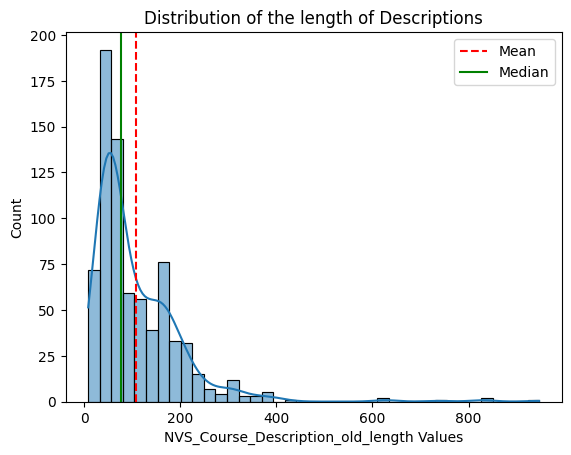

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot distribution of values of NVS_Course_Description_length for objects in treatment group before intervention
sns.histplot(data=df_changed_only, x='NVS_Course_Description_old_length', kde=True)
plt.axvline(df_changed_only['NVS_Course_Description_old_length'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(df_changed_only['NVS_Course_Description_old_length'].median(), color='g', linestyle='-', label='Median')
plt.title('Distribution of the length of Descriptions')
plt.xlabel('NVS_Course_Description_old_length Values')
plt.ylabel('Count')
plt.legend()
plt.show()

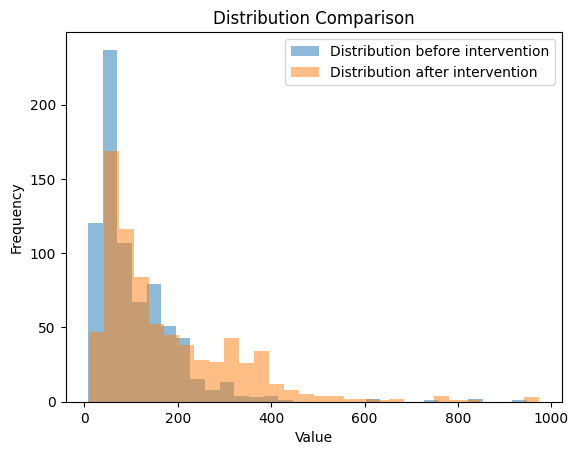

In [16]:
import matplotlib.pyplot as plt
import numpy as np

data1 = df_changed_only.NVS_Course_Description_old_length
data2 = df_changed_only.NVS_Course_Description_new_length


# Plotting the histogram, comparison of distributions before and after intervention
plt.hist(data1, bins=30, alpha=0.5, label='Distribution before intervention')
plt.hist(data2, bins=30, alpha=0.5, label='Distribution after intervention')

# Adding labels and a legend
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution Comparison')
plt.legend()

# Displaying the plot
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=09374e14-43a4-4eee-b362-608228cad85e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>